In [2]:
import requests
import json
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

api_key = '79049b106d30525bf75a314734b69b46'

#세션생성
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
session = requests.Session()
session.headers.update( {'User-agent': user_agent, 'referer': None} )


url_tpl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={date}"

today = dt.datetime.now()
delta = dt.timedelta(days = -1)
yesterday = today + delta
yesterday_str = yesterday.strftime('%Y%m%d')
yesterday_str


'20210517'

In [4]:
api_url = url_tpl.format(key = api_key, date=yesterday_str)
api_url

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=79049b106d30525bf75a314734b69b46&targetDt=20210517'

In [5]:
# API를 통한 JSON 가져오기

r = session.get(api_url)

if r.status_code != 200:
    print("[%d Error] %s" % (r.status_code, r.reason))
    quit()

r.encoding = 'utf-8'
r.text

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20210517~20210517","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20217484","movieNm":"스파이럴","openDt":"2021-05-12","salesAmt":"77722260","salesShare":"24.5","salesInten":"-165815050","salesChange":"-68.1","salesAcc":"961101820","audiCnt":"8026","audiInten":"-15562","audiChange":"-66","audiAcc":"96334","scrnCnt":"616","showCnt":"1914"},{"rnum":"2","rank":"2","rankInten":"2","rankOldAndNew":"OLD","movieCd":"20200703","movieNm":"극장판 귀멸의 칼날: 무한열차편","openDt":"2021-01-27","salesAmt":"34347410","salesShare":"10.8","salesInten":"-81424310","salesChange":"-70.3","salesAcc":"19337985640","audiCnt":"3579","audiInten":"-8218","audiChange":"-69.7","audiAcc":"2007785","scrnCnt":"426","showCnt":"674"},{"rnum":"3","rank":"3","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20216703","movieNm":"더 스파이","openDt":"2021-04-28","salesAmt":"32373750","salesShare":"10.2","salesInten":"-111156240","sales

In [6]:
daily_boxoffice_dict = json.loads(r.text)
daily_boxoffice_dict

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20210517~20210517',
  'dailyBoxOfficeList': [{'rnum': '1',
    'rank': '1',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20217484',
    'movieNm': '스파이럴',
    'openDt': '2021-05-12',
    'salesAmt': '77722260',
    'salesShare': '24.5',
    'salesInten': '-165815050',
    'salesChange': '-68.1',
    'salesAcc': '961101820',
    'audiCnt': '8026',
    'audiInten': '-15562',
    'audiChange': '-66',
    'audiAcc': '96334',
    'scrnCnt': '616',
    'showCnt': '1914'},
   {'rnum': '2',
    'rank': '2',
    'rankInten': '2',
    'rankOldAndNew': 'OLD',
    'movieCd': '20200703',
    'movieNm': '극장판 귀멸의 칼날: 무한열차편',
    'openDt': '2021-01-27',
    'salesAmt': '34347410',
    'salesShare': '10.8',
    'salesInten': '-81424310',
    'salesChange': '-70.3',
    'salesAcc': '19337985640',
    'audiCnt': '3579',
    'audiInten': '-8218',
    'audiChange': '-69.7',
    'audiAcc': '2007785',
    'scrnCnt': '426',

In [7]:
daily_boxoffice_df = DataFrame(daily_boxoffice_dict['boxOfficeResult']['dailyBoxOfficeList'])
daily_boxoffice_df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20217484,스파이럴,2021-05-12,77722260,24.5,-165815050,-68.1,961101820,8026,-15562,-66,96334,616,1914
1,2,2,2,OLD,20200703,극장판 귀멸의 칼날: 무한열차편,2021-01-27,34347410,10.8,-81424310,-70.3,19337985640,3579,-8218,-69.7,2007785,426,674
2,3,3,0,OLD,20216703,더 스파이,2021-04-28,32373750,10.2,-111156240,-77.4,2648865720,3551,-11130,-75.8,286637,464,910
3,4,4,1,OLD,20193068,비와 당신의 이야기,2021-04-28,28524430,9.0,-74970210,-72.4,3229902860,3140,-7407,-70.2,350031,474,906
4,5,5,2,OLD,20205144,미나리,2021-03-03,17165620,5.4,-42035080,-71,10065419760,2021,-4193,-67.5,1115831,354,475
5,6,6,0,OLD,20194501,내일의 기억,2021-04-21,16777190,5.3,-50733570,-75.1,2953300230,1763,-4822,-73.2,325589,293,457
6,7,7,2,OLD,20214763,내겐 너무 소중한 너,2021-05-12,13198050,4.2,-26919660,-67.1,173196420,1473,-2752,-65.1,18831,333,535
7,8,8,3,OLD,20200524,아들의 이름으로,2021-05-12,11031900,3.5,-18862130,-63.1,143593490,1311,-1944,-59.7,16509,326,502
8,9,9,-7,OLD,20202585,크루즈 패밀리: 뉴 에이지,2021-05-05,10664230,3.4,-134869810,-92.7,1838716900,1190,-15116,-92.7,207874,280,401
9,10,10,0,OLD,20216710,명탐정 코난: 비색의 탄환,2021-04-16,6661370,2.1,-28566120,-81.1,2096232480,725,-2962,-80.3,222419,165,201


# 전처리과정

In [9]:
tmp_df = daily_boxoffice_df.filter(['movieNm', 'audiCnt'])
tmp_df

,movieNm,audiCnt
0,스파이럴,8026
1,극장판 귀멸의 칼날: 무한열차편,3579
2,더 스파이,3551
3,비와 당신의 이야기,3140
4,미나리,2021
5,내일의 기억,1763
6,내겐 너무 소중한 너,1473
7,아들의 이름으로,1311
8,크루즈 패밀리: 뉴 에이지,1190
9,명탐정 코난: 비색의 탄환,725


In [12]:
tmp_df2 = tmp_df.rename(columns={'movieNm' : '영화이름', 'audiCnt' : '관객수'})
tmp_df2.set_index('영화이름', inplace=True)
tmp_df2

,관객수
영화이름,
스파이럴,8026
극장판 귀멸의 칼날: 무한열차편,3579
더 스파이,3551
비와 당신의 이야기,3140
미나리,2021
내일의 기억,1763
내겐 너무 소중한 너,1473
아들의 이름으로,1311
크루즈 패밀리: 뉴 에이지,1190


In [15]:
tmp_df2['관객수']
# type이 object임

영화이름
스파이럴                 8026
극장판 귀멸의 칼날: 무한열차편    3579
더 스파이                3551
비와 당신의 이야기           3140
미나리                  2021
내일의 기억               1763
내겐 너무 소중한 너          1473
아들의 이름으로             1311
크루즈 패밀리: 뉴 에이지       1190
명탐정 코난: 비색의 탄환        725
Name: 관객수, dtype: object

In [35]:
tmp_df2['관객수'] = tmp_df2['관객수'].apply(pd.to_numeric)
daily_rank_df = tmp_df2.sort_values(by = ['관객수'], ascending=True)
daily_rank_df

,관객수
영화이름,
명탐정 코난: 비색의 탄환,725
크루즈 패밀리: 뉴 에이지,1190
아들의 이름으로,1311
내겐 너무 소중한 너,1473
내일의 기억,1763
미나리,2021
비와 당신의 이야기,3140
더 스파이,3551
극장판 귀멸의 칼날: 무한열차편,3579


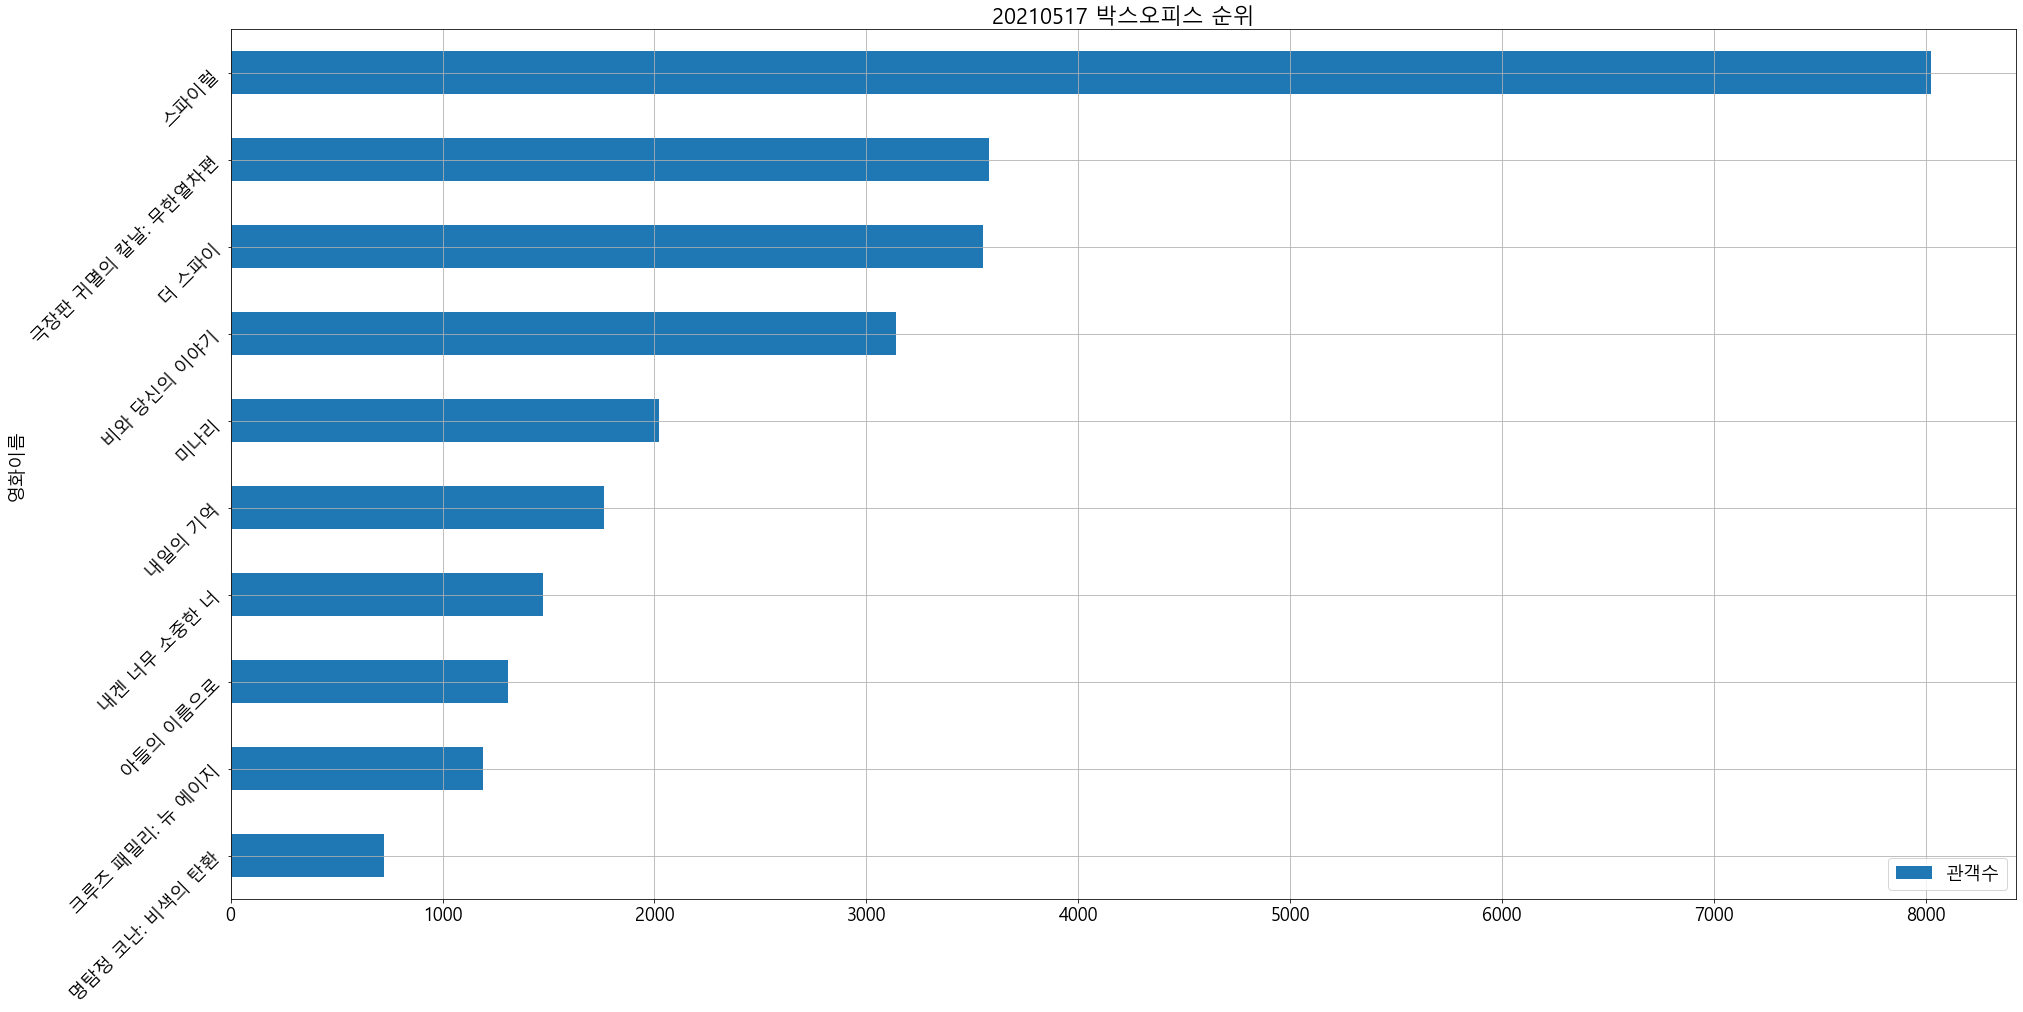

In [36]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (32, 16)

daily_rank_df.plot.barh(rot=45)
plt.grid()
plt.title('%s 박스오피스 순위' %yesterday_str)
plt.legend()
plt.show()
plt.close()

## 일주일간 통계

In [42]:
# 빈데이터 프레임 준비
weekly_df = DataFrame()

for i in range(-7, 0):

    #조회날짜 문자열
    today = dt.datetime.now()
    delta = dt.timedelta(days = i)
    yesterday = today + delta
    yesterday_str = yesterday.strftime('%Y%m%d')
    
    # api주소 확인
    api_url = url_tpl.format(key = api_key, date = yesterday_str)

    # 세션연결
    r = session.get(api_url)

    if r.status_code != 200:
        print("[%d Error] %s" % (r.status_code, r.reason))
        # 특정 주소에 대해 에러가 발생하더라도 다른 주소에 대한 수집을 시도하기 위해               반복을 계속 수행
        continue

    r.encoding = 'utf-8'

    # 데이터 프레임 변환
    daily_boxoffice_dict = json.loads(r.text)
    daily_boxoffice_df = DataFrame(daily_boxoffice_dict['boxOfficeResult']['dailyBoxOfficeList'])

    tmp_df = daily_boxoffice_df.filter(['movieNm', 'audiCnt'])

    # 컬럼이름 변경 --> 관람객 수를 의미하는 컬럼을 해당 날짜로 변경한다.
    tmp_df2 = tmp_df.rename(columns={'movieNm': '영화제목', 'audiCnt': yesterday_str})
        
    # 영화제목을 인덱스로 지정
    daily_rank_df = tmp_df2.set_index('영화제목')
    
    # 관람객 컬럼의 타입을 숫자형식으로 변환
    daily_rank_df[yesterday_str] = daily_rank_df[yesterday_str].apply(pd.to_numeric)
    
    # 영화이름(daily_rank_df의 인덱스)가 동일한 데이터를 기준으로 누적
    # -> how값을 outer로 지정하여 중복되지 않는 인덱스명(영화제목)도 누락되지 않도록 한다.
    weekly_df = pd.merge(weekly_df, daily_rank_df, left_index=True, right_index=True, how="outer")
    

weekly_df


,20210511,20210512,20210513,20210514,20210515,20210516,20210517
영화제목,,,,,,,
극장판 귀멸의 칼날: 무한열차편,3864.0,3601.0,3475.0,4976.0,12354.0,11797.0,3579.0
극장판 콩순이: 장난감나라 대모험,1449.0,NaN,NaN,NaN,5042.0,5356.0,NaN
내가 죽기를 바라는 자들,2335.0,NaN,NaN,NaN,NaN,NaN,NaN
내겐 너무 소중한 너,NaN,NaN,1599.0,1874.0,4288.0,4225.0,1473.0
내일의 기억,2632.0,1793.0,1648.0,2499.0,6597.0,6585.0,1763.0
더 스파이,5254.0,3269.0,3278.0,5627.0,16580.0,14681.0,3551.0
명탐정 코난: 비색의 탄환,1052.0,NaN,NaN,1187.0,3846.0,3687.0,725.0
미나리,2954.0,2347.0,2082.0,2425.0,6039.0,6214.0,2021.0
비와 당신의 이야기,5927.0,4449.0,3963.0,5073.0,12152.0,10547.0,3140.0


## 결측치 대체

In [45]:
# NA이면 관객수가 없다는 뜻이기 때문에 0 으로 치환
final_df = weekly_df.fillna(0)
final_df

,20210511,20210512,20210513,20210514,20210515,20210516,20210517
영화제목,,,,,,,
극장판 귀멸의 칼날: 무한열차편,3864.0,3601.0,3475.0,4976.0,12354.0,11797.0,3579.0
극장판 콩순이: 장난감나라 대모험,1449.0,0.0,0.0,0.0,5042.0,5356.0,0.0
내가 죽기를 바라는 자들,2335.0,0.0,0.0,0.0,0.0,0.0,0.0
내겐 너무 소중한 너,0.0,0.0,1599.0,1874.0,4288.0,4225.0,1473.0
내일의 기억,2632.0,1793.0,1648.0,2499.0,6597.0,6585.0,1763.0
더 스파이,5254.0,3269.0,3278.0,5627.0,16580.0,14681.0,3551.0
명탐정 코난: 비색의 탄환,1052.0,0.0,0.0,1187.0,3846.0,3687.0,725.0
미나리,2954.0,2347.0,2082.0,2425.0,6039.0,6214.0,2021.0
비와 당신의 이야기,5927.0,4449.0,3963.0,5073.0,12152.0,10547.0,3140.0


In [46]:
# 날짜가 x 축이 되어야 하기 때문에 전치
final_df_trans = final_df.T
final_df_trans

영화제목,극장판 귀멸의 칼날: 무한열차편,극장판 콩순이: 장난감나라 대모험,내가 죽기를 바라는 자들,내겐 너무 소중한 너,내일의 기억,더 스파이,명탐정 코난: 비색의 탄환,미나리,비와 당신의 이야기,빅 피쉬,슈퍼노바,스파이럴,아들의 이름으로,크루즈 패밀리: 뉴 에이지
20210511,3864.0,1449.0,2335.0,0.0,2632.0,5254.0,1052.0,2954.0,5927.0,0.0,0.0,2085.0,0.0,2707.0
20210512,3601.0,0.0,0.0,0.0,1793.0,3269.0,0.0,2347.0,4449.0,1849.0,2211.0,15841.0,2479.0,1923.0
20210513,3475.0,0.0,0.0,1599.0,1648.0,3278.0,0.0,2082.0,3963.0,0.0,1355.0,9526.0,2155.0,1374.0
20210514,4976.0,0.0,0.0,1874.0,2499.0,5627.0,1187.0,2425.0,5073.0,0.0,0.0,10448.0,2370.0,2061.0
20210515,12354.0,5042.0,0.0,4288.0,6597.0,16580.0,3846.0,6039.0,12152.0,0.0,0.0,26547.0,0.0,15001.0
20210516,11797.0,5356.0,0.0,4225.0,6585.0,14681.0,3687.0,6214.0,10547.0,0.0,0.0,23588.0,0.0,16306.0
20210517,3579.0,0.0,0.0,1473.0,1763.0,3551.0,725.0,2021.0,3140.0,0.0,0.0,8026.0,1311.0,1190.0


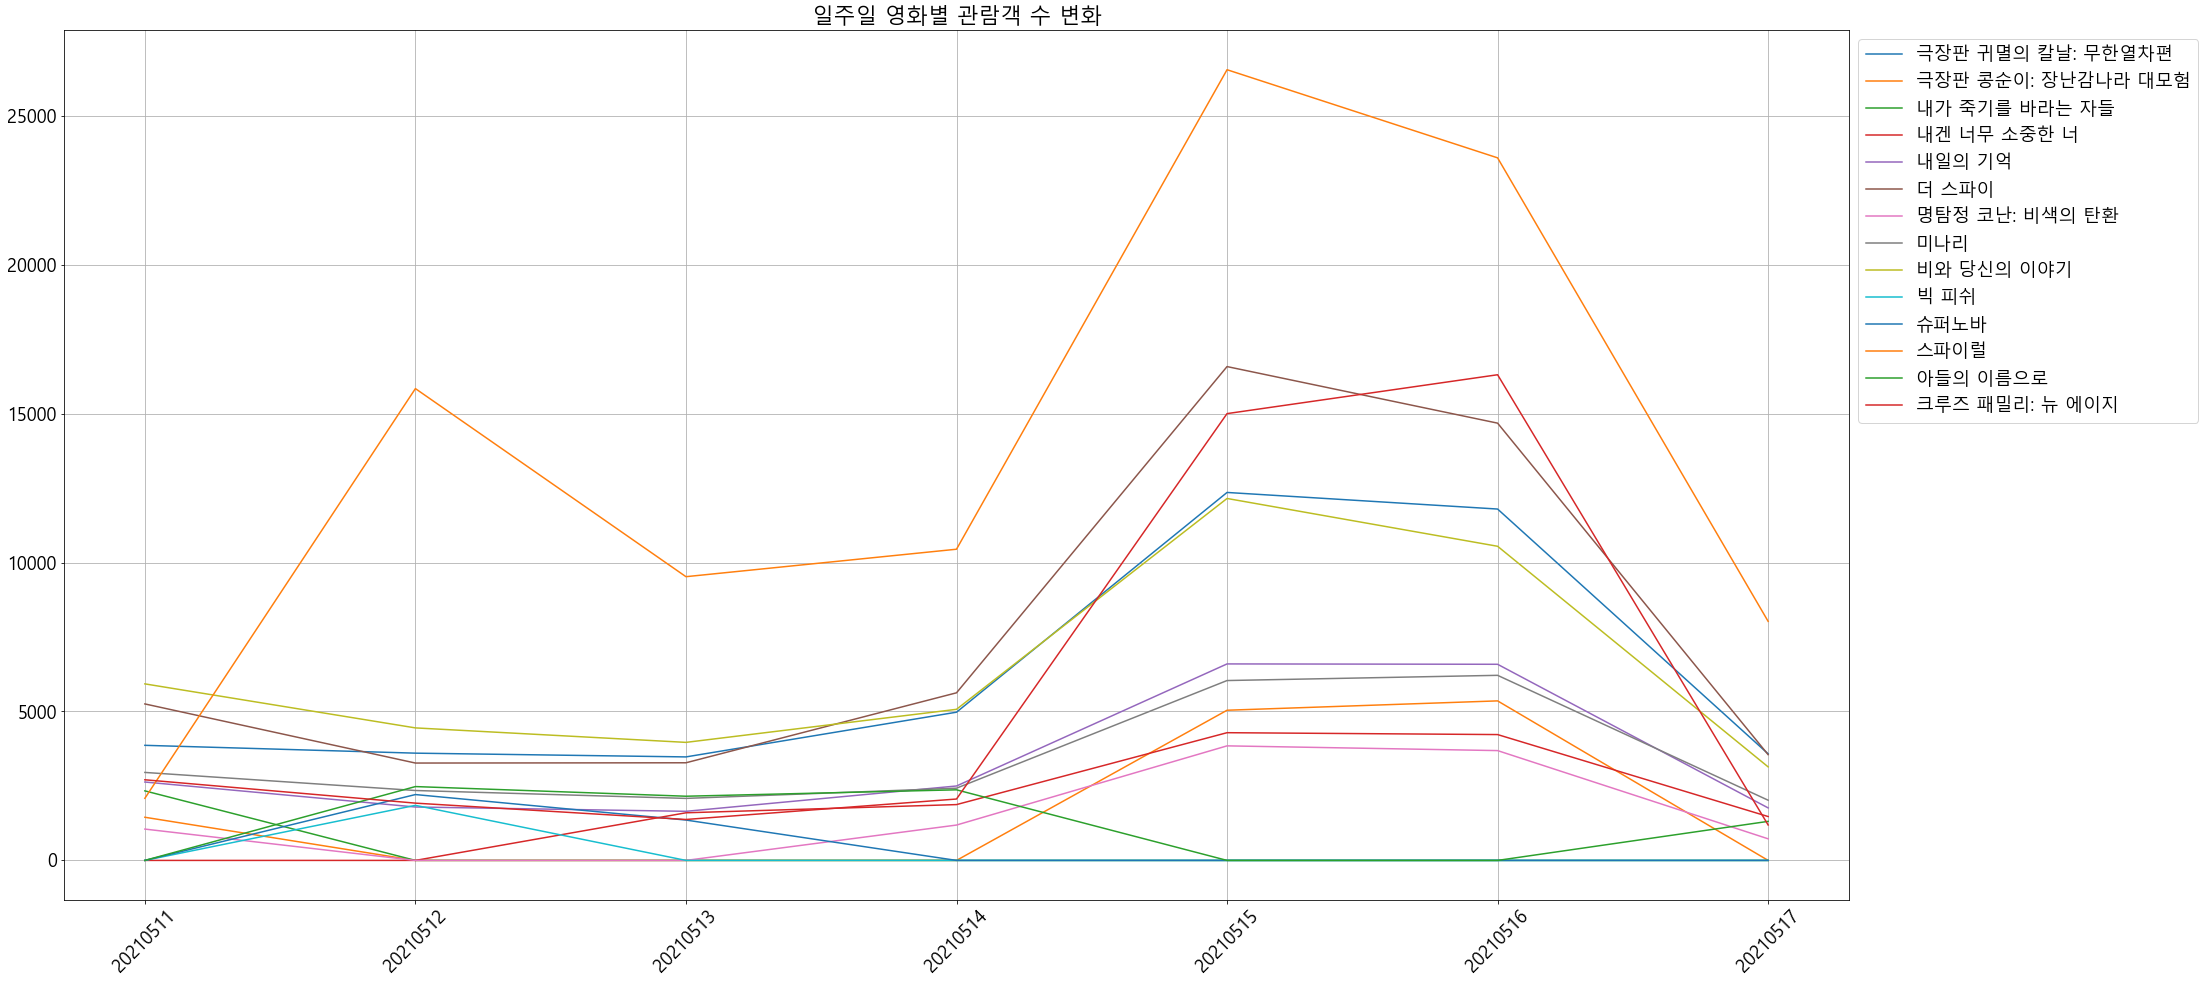

In [48]:
final_df_trans.plot(rot=45)
plt.grid()
plt.title('일주일 영화별 관람객 수 변화')
plt.legend(bbox_to_anchor = (1,1))
plt.show()
plt.close()